In [1]:
import os, sys
sys.path.append(os.path.abspath('../src'))
from chemspace import Fingerprints, load_data, NMRVector, IRVector, ChemicalSpaceGraph
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
graph = ChemicalSpaceGraph.from_file('../cache-scaled-0.1.h5', '../cache-euclidean-scaled-0.1.p')
len(graph.edges)

840456

In [3]:
edges = pd.DataFrame([[a, b, graph.edges[(a, b)]] for a, b in graph.edges])
edges.describe()

,2
count,840456.000000
mean,15.235582
std,8.693954
min,0.099779
25%,13.034960
50%,14.883651
75%,16.798762
max,225.469359


Text(0,0.5,'No. (log)')

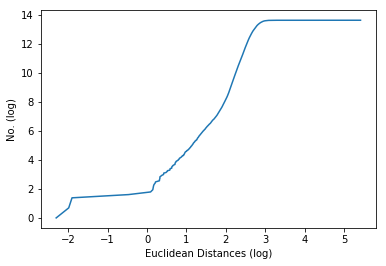

In [8]:
values = edges[2].sort_values()
plt.plot(np.log(values), np.log(np.arange(1, 1 + len(values))))
plt.xlabel('Euclidean Distances (log)')
plt.ylabel('No. (log)')

In [10]:
for i in range(15):
    t = 9 - i
    print(t, len(edges[edges[2] < t]))

9 14755
8 5867
7 2658
6 1285
5 691
4 353
3 129
2 39
1 5
0 0
-1 0
-2 0
-3 0
-4 0
-5 0


In [11]:
from gephistreamer import graph as gephi_graph, streamer
base = graph.fingerprints_df['Cc1cc2ccoc(=O)n2n1']
gephi_nodes = [gephi_graph.Node(x, d=ChemicalSpaceGraph.similarity(graph.fingerprints_df[x], base)) for x in graph.nodes]

In [12]:
def show(threshold, prefix='euclidean-'):
    a = edges[edges[2] < threshold]
    m = a[2].max()
    f = lambda x: 1 - x / m
    gephi_edges_ = [
        gephi_graph.Edge(x, y, directed=False, weight=f(graph.edges[(x, y)]), label='%.4f' % graph.edges[(x, y)])
        for x, y in graph.edges
        if graph.edges[(x, y)] <= threshold
    ]
    print(len(gephi_edges_))
    stream = streamer.Streamer(streamer.GephiWS(workspace='%s%s' % (prefix, threshold)))
    stream.add_node(*gephi_nodes)
    stream.add_edge(*gephi_edges_)
    return gephi_edges_

In [13]:
show(7.5);

3892


In [16]:
show(8.0);

5867
